# Contexto inicial

**Título:** Análisis Exploratorio de Datos  
**Autores:** Tiffany Mendoza S. y Sergio Rada  

## Objetivo del análisis

Construir un análisis exploratorio de datos que caracterice la base de datos financiera proveniente de los bancos centrales de la Unión Europea para reconocer inicialmente incidencias repetitivas asociadas a casos de fraude.

## Origen y descripción del dataset

El presente dataset muestra estadisticas de alto nivel sobre el total de transacciones financieras legales y fraudulentas realizadas en la Unión Europea. Esta información es recolectada por el Banco Central Europeo (ECB), entidad que valida semestralmente los reportes enviados por los Bancos Centrales Nacionales del continente. La última actualización fue realizada el 29 de enero del presente año y se encuentra disponible en el repositorio publico de datos del ECB.

### Caracterización general

Como veremos a continuación, el dataset cuenta con **662.616** transacciones caracterizadas en **29** columnas que serán descritas en la siguiente sección.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

datos = pd.read_csv("/Users/pctm/Downloads/data_payments.csv")

In [2]:
print(datos.shape)

print(datos.columns)

(662616, 29)
Index(['KEY', 'FREQ', 'REF_AREA', 'COUNT_AREA', 'TYP_TRNSCTN', 'RL_TRNSCTN',
       'FRD_TYP', 'TRANSFORMATION', 'UNIT_MEASURE', 'TIME_PERIOD', 'OBS_VALUE',
       'OBS_STATUS', 'CONF_STATUS', 'PRE_BREAK_VALUE', 'COMMENT_OBS',
       'TIME_FORMAT', 'BREAKS', 'COMMENT_TS', 'COMPILING_ORG', 'DISS_ORG',
       'TIME_PER_COLLECT', 'COVERAGE', 'DATA_COMP', 'DECIMALS', 'METHOD_REF',
       'TITLE', 'TITLE_COMPL', 'UNIT', 'UNIT_MULT'],
      dtype='object')


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662616 entries, 0 to 662615
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   KEY               662616 non-null  object 
 1   FREQ              662616 non-null  object 
 2   REF_AREA          662616 non-null  object 
 3   COUNT_AREA        662616 non-null  object 
 4   TYP_TRNSCTN       662616 non-null  object 
 5   RL_TRNSCTN        662616 non-null  object 
 6   FRD_TYP           662616 non-null  object 
 7   TRANSFORMATION    662616 non-null  object 
 8   UNIT_MEASURE      662616 non-null  object 
 9   TIME_PERIOD       662616 non-null  object 
 10  OBS_VALUE         518741 non-null  float64
 11  OBS_STATUS        662616 non-null  object 
 12  CONF_STATUS       662616 non-null  object 
 13  PRE_BREAK_VALUE   0 non-null       float64
 14  COMMENT_OBS       5165 non-null    object 
 15  TIME_FORMAT       662616 non-null  object 
 16  BREAKS            0 

### Diccionario de columnas

**1. KEY:** Clave compuesta de transacción

**2. FREQ:** Frecuencia con la que se realiza determinado pago (Anual, trimestral, semestral, etc.).

**3. REF_AREA:** País origen de la transacción.

**4. COUNT_AREA:** Institución origen de la transacción.

**5. TYP_TRNSCTN:** Clasificación de la transacción (Depósito, retiro, cheques, transferencias, etc.).

**6. RL_TRNSCTN:** Clasificación de la entidad procesa la transacción.

**7. FRD_TYP:** Clasificación del fraude (No autorizado, tarjeta robada, sin fraude, etc).

**8. TRANSFORMATION:** Transformación realizada a la transacción (niveles anuales, contribución a la tasa, promedio móvil, no aplica).

**9. UNIT_MEASURE:** Unidad o divisa involucrada en la transacción.

**10. TIME_PERIOD:** Año en el que se procesó la transacción.

**11. OBS_VALUE:** Monto de la transacción.

**12. OBS_STATUS:** Clasificación del monto de la transacción (revisado, no validado, valor provisional, etc).

**13. CONF_STATUS:** Clasificación de confidencialidad (Libre, restringido, etc).

**14. PRE_BREAK_VALUE:** No especificada en la documentación.

**15. COMMENT_OBS:** Observaciones.

**16. TIME_FORMAT:** Columna copia de FREQ.

**17. BREAKS:** No especificada en la documentación.

**18. COMMENT_TS:** No especificada en la documentación.

**19. COMPILING_ORG:** No especificada en la documentación.

**20. DISS_ORG:** No especificada en la documentación.

**21. TIME_PER_COLLECT:** No especificada en la documentación.

**22. COVERAGE:** No especificada en la documentación.

**23. DATA_COMP:** No especificada en la documentación.

**24. DECIMALS:** Indica la cantidad de decimales presentes en el monto.

**25. METHOD_REF:** Metodolofia utilizada para la recolección del dato.

**26. TITLE:** Descripción de transacción.

**27. TITLE_COMPL:** Columna copia de TITLE.

**28. UNIT:** Columna copia de UNIT_MEASURE.

**29. UNIT_MULT:** Indica el multiplicador del monto de la transacción.

### Columnas a utilizar

Si se analiza detenidamente, se encuentran varias columnas con información duplicada. Del mismo modo, hay columnas cuya información no se encuentra adecuadamente documentada dificultando así la clasificación de su impacto en el conjunto de datos. Por tanto, solo se tendrán en cuenta las columnas listadas a continuación: 

**1. KEY >> ID:** Clave compuesta de transacción.

**2. FREQ:** Frecuencia con la que se realiza determinado pago (Anual, trimestral, semestral, etc.)

**3. REF_AREA >> COUNTRY_ORIGIN:** País origen de la transacción.

**4. COUNT_AREA >> COUNTRY_DESTINATION:** Institución origen de la transacción.

**5. TYP_TRNSCTN >> TYPE_TRX :** Clasificación de la transacción (Depósito, retiro, cheques, transferencias, etc.).

**6. RL_TRNSCTN >> TYPE_PSP :** Clasificación de la entidad procesa la transacción.

**7. FRD_TYP >> TYPE_FRAUD:** Clasificación del fraude (No autorizado, tarjeta robada, sin fraude, etc).

**9. UNIT_MEASURE >> UNIT:** Unidad o divisa involucrada en la transacción.

**10. TIME_PERIOD >> YEAR:** Año en el que se procesó la transacción.

**11. OBS_VALUE >> AMOUNT:** Monto de la transacción.

**12. OBS_STATUS >> TYPE_AMOUNT:** Clasificación del monto de la transacción (revisado, no validado, valor provisional, etc).

**24. DECIMALS:** Indica la cantidad de decimales presentes en el monto.

**26. TITLE >> DESCRIPTION:** Descripción de transacción.

**29. UNIT_MULT:** Indica el multiplicador del monto de la transacción.

### Dataframe resultante

In [4]:
df = datos.rename(columns={
    'KEY':          'ID',
    'REF_AREA':     'COUNTRY_ORIGIN',
    'COUNT_AREA':   'COUNTRY_DESTINATION',
    'TYP_TRNSCTN':  'TYPE_TRX',
    'RL_TRNSCTN':   'TYPE_PSP',
    'FRD_TYP':      'TYPE_FRAUD',
    'UNIT_MEASURE': 'UNIT',
    'TIME_PERIOD':  'YEAR',
    'OBS_VALUE':    'AMOUNT',
    'OBS_STATUS':   'TYPE_AMOUNT',
    'TITLE':        'DESCRIPTION'
})[[  
    'ID', 'FREQ', 'COUNTRY_ORIGIN', 'COUNTRY_DESTINATION',
    'TYPE_TRX', 'TYPE_PSP', 'TYPE_FRAUD', 'UNIT',
    'YEAR', 'AMOUNT', 'TYPE_AMOUNT', 'DECIMALS',
    'DESCRIPTION', 'UNIT_MULT'
]]

df.head()

,ID,FREQ,COUNTRY_ORIGIN,COUNTRY_DESTINATION,TYPE_TRX,TYPE_PSP,TYPE_FRAUD,UNIT,UNIT,YEAR,AMOUNT,TYPE_AMOUNT,DECIMALS,DESCRIPTION,UNIT_MULT
0,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,PN,2014,0.242,A,3,"Total payment transactions, incl. cash withdra...",6
1,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,PN,2015,0.268,A,3,"Total payment transactions, incl. cash withdra...",6
2,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,PN,2016,0.689,A,3,"Total payment transactions, incl. cash withdra...",6
3,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,PN,2017,0.632,A,3,"Total payment transactions, incl. cash withdra...",6
4,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,PN,2018,0.615,A,3,"Total payment transactions, incl. cash withdra...",6


## Identificación de valores faltantes

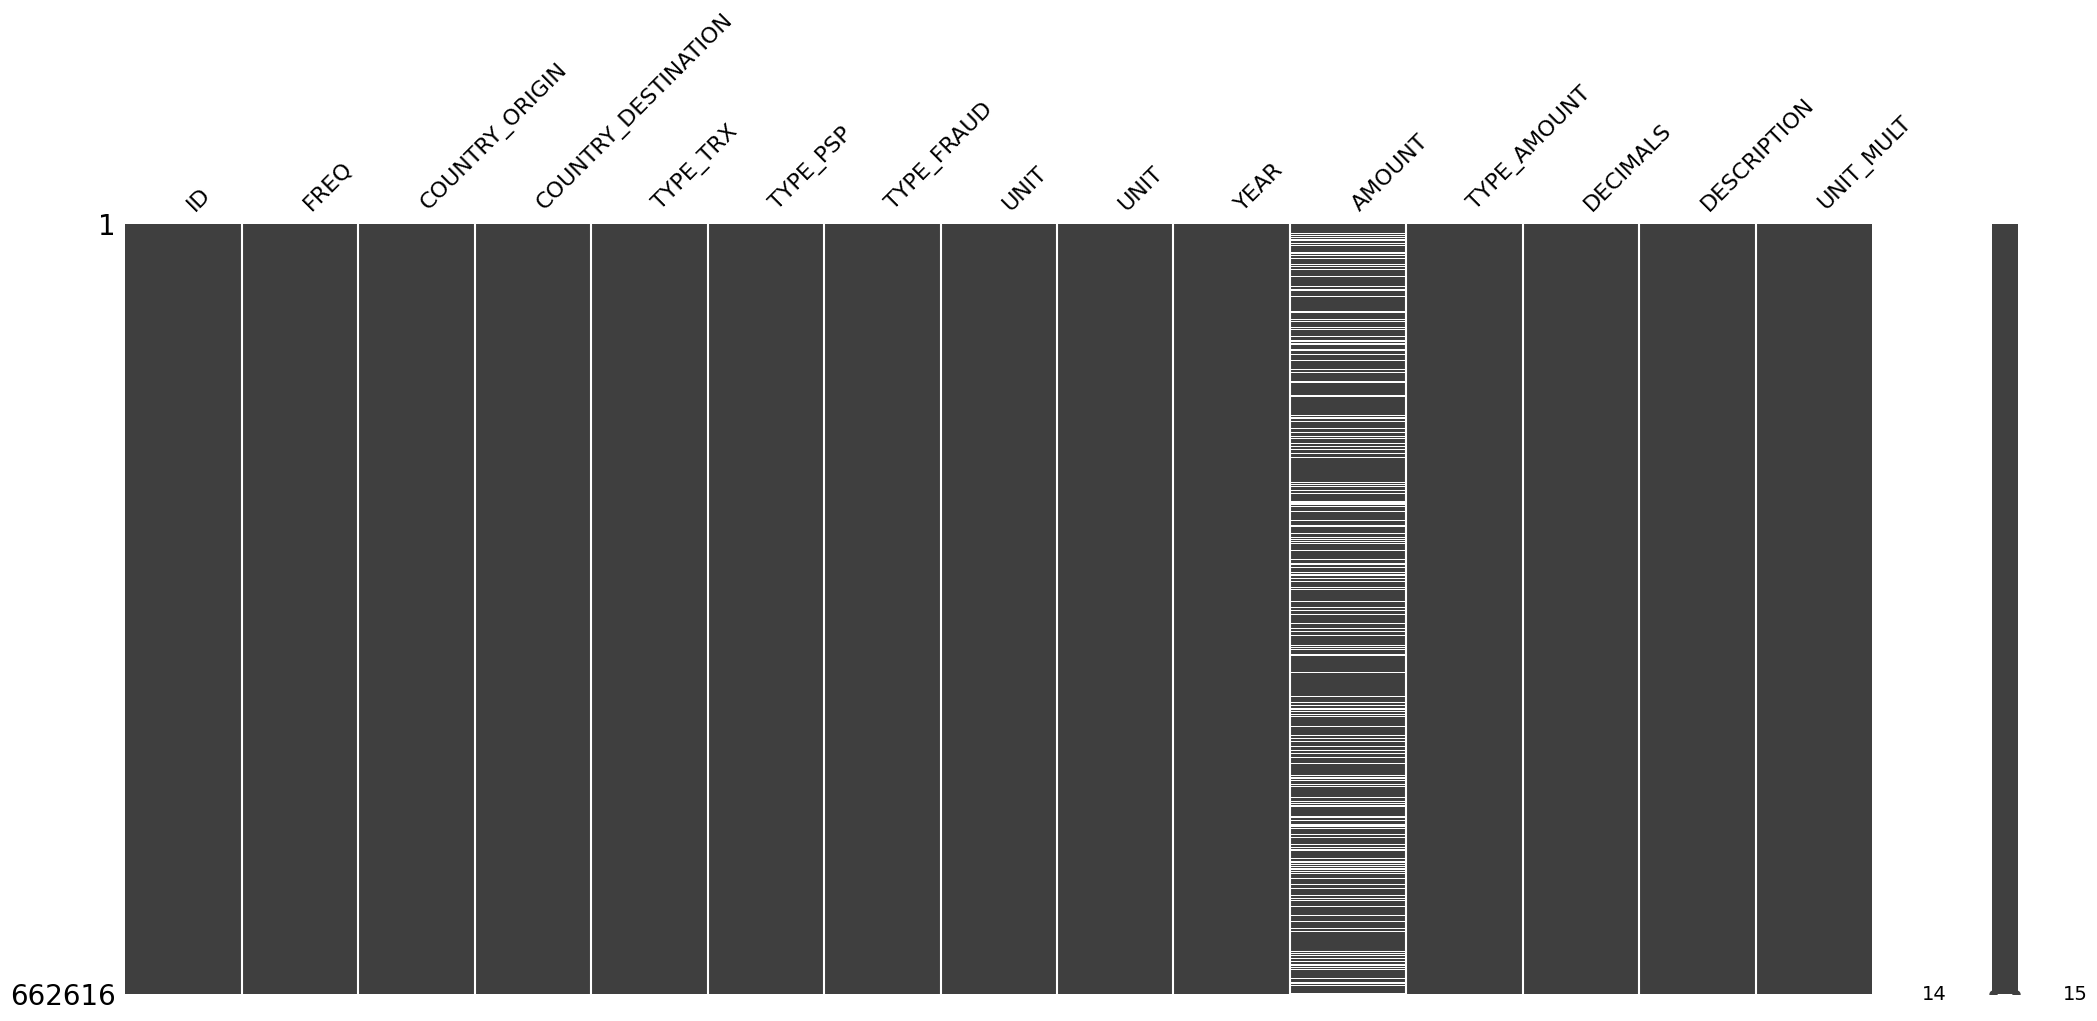

In [5]:
# Mapa de valores faltantes (equivalente a missmap() de Amelia en R)
msno.matrix(df)
plt.show()

In [6]:
df.isnull().sum().to_frame(name='NA_count')

,NA_count
ID,0
FREQ,0
COUNTRY_ORIGIN,0
COUNTRY_DESTINATION,0
TYPE_TRX,0
TYPE_PSP,0
TYPE_FRAUD,0
UNIT,0
UNIT,0
YEAR,0


Al explorar un poco más el dataset, se encuentra que la mayoría de columnas tienen 0 valores faltantes en las observaciones. Aún así, es importante destacar que la columna AMOUNT concentra el total de missing values con 143875 NAs.